In [1]:
import numpy as np
from src.lpvds.src.util import load_tools
from src.util import optimize_tools
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


Using LASA DataSet from /Users/sunansun/miniconda3/envs/venv3.8/lib/python3.8/site-packages/pyLasaDataset/resources/LASAHandwritingDataset/DataSet


In [2]:
# x, x_dot, x_att, x_init = load_tools.load_data(2)



# N2 = 200
# sequence_arr = np.zeros((x.shape[0], ), dtype=int)
# sequence_arr[N2: ] = 1

In [3]:
x, x_dot, x_att, x_init = load_tools.load_data(2)


N1 = 500

sequence_arr = np.zeros((x.shape[0], ), dtype=int)
sequence_arr[N1: ] = 1


You selected LASA benchmark dataset.



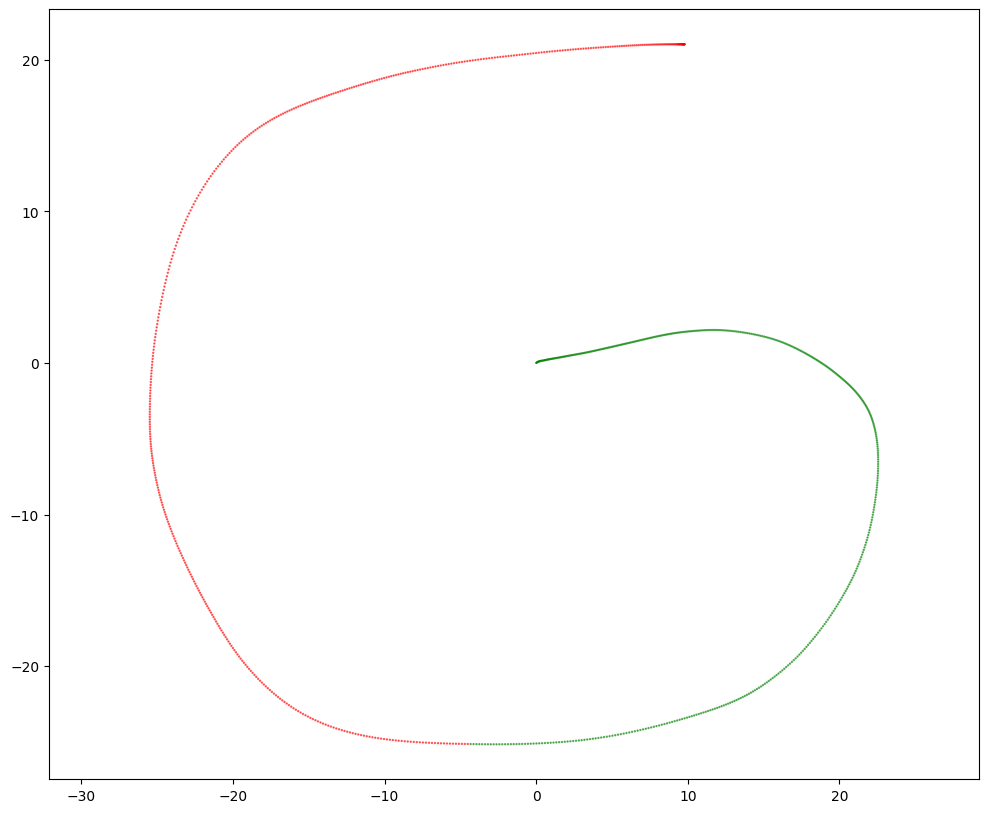

In [4]:
x_1 = x[sequence_arr==0, :]
x_dot_1 = x_dot[sequence_arr==0, :]


x_2 = x[sequence_arr==1, :]
x_dot_2 = x_dot[sequence_arr==1, :]


colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
color_mapping = np.take(colors, sequence_arr)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.scatter(x[:, 0], x[:, 1], color=color_mapping[:], alpha= 0.6, s=0.5)
ax.axis('equal')
plt.show()

In [5]:
# A_1 = [-1 * np.eye(2)]
A_2 = [-1 * np.eye(2)]

x_att_1 = x_1[-1, :] - 0.01* np.random.rand(2,).reshape(1, -1) # Random initialization

# x_att_2 = x_att - 0.01 * np.random.rand(2,).reshape(1, -1) # Random initialization

x_att_2 = x_att.reshape(1, -1)


[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.52441071 -25.14177041]]
[[ -4.5244

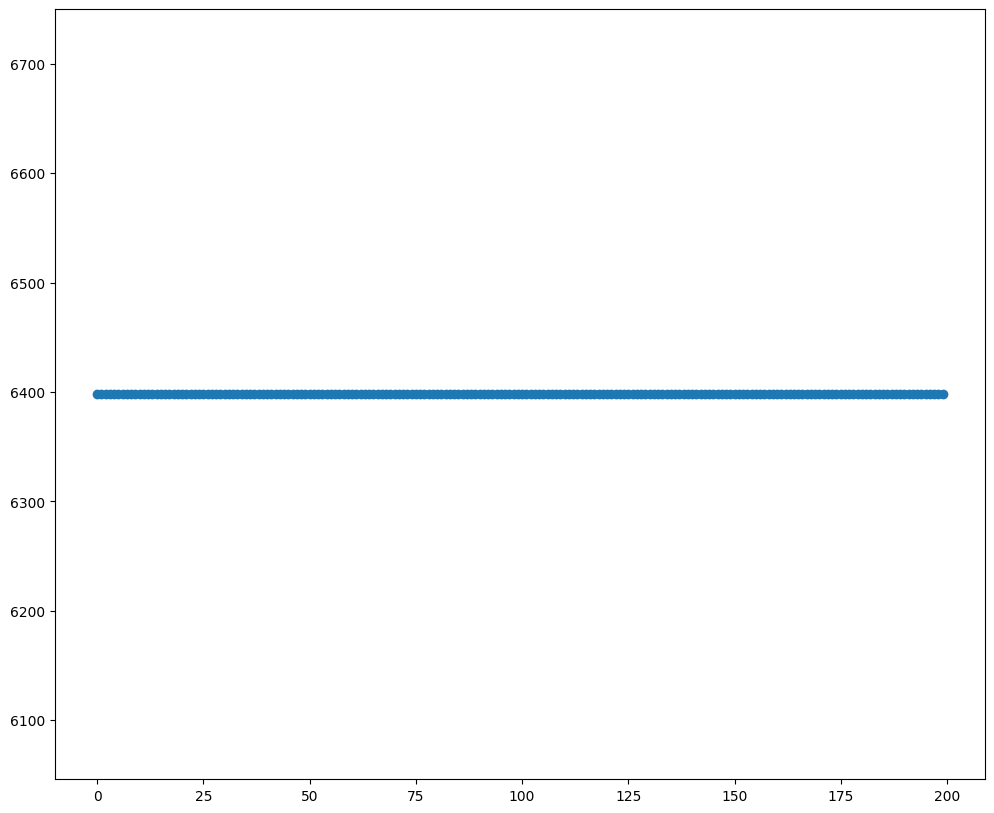

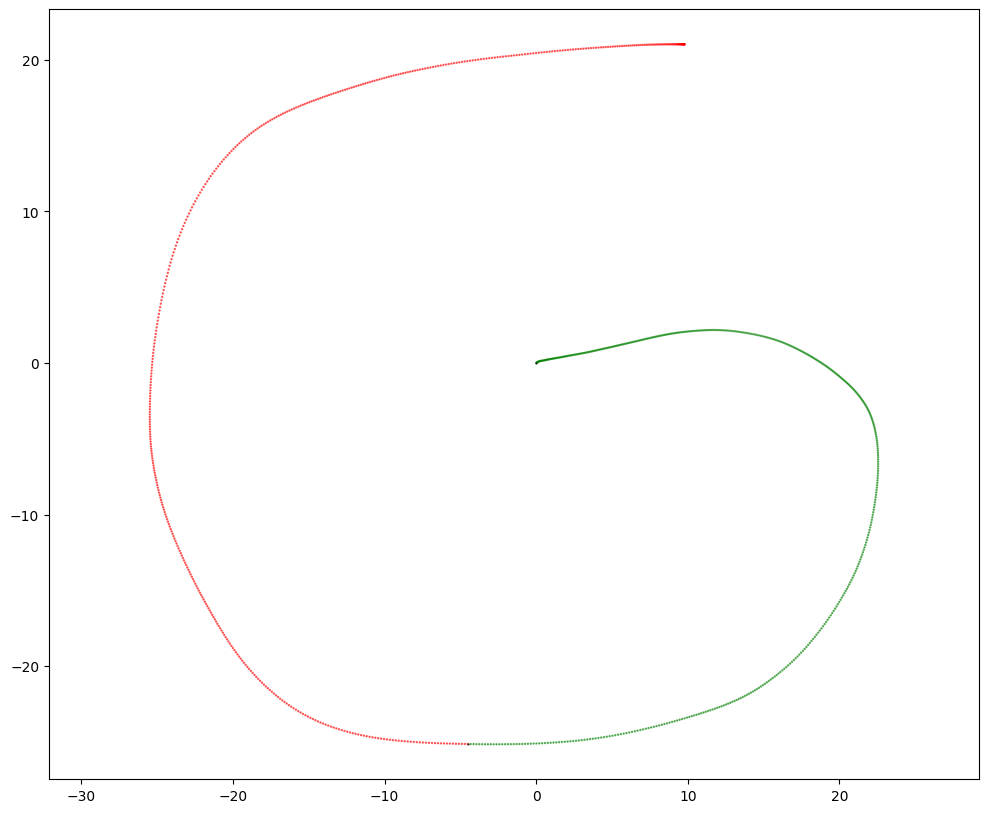

In [6]:
T = 200
x_att_list = []
MSE_list = []
for i in range(T):
    # x_att_1 = optimize_tools.optimize_att(x_1, x_dot_1, A_1)

    P_1 = optimize_tools._optimize_P(x_1-x_att_1, x_dot_1, np.zeros((x_1.shape[0], ), dtype=int))
    A_1 = optimize_tools.optimize_A(x_1, x_dot_1, x_att_1, gamma=np.ones((1, x_1.shape[0]), dtype=int), P=P_1)

    # x_att_2 = optimize_tools.optimize_att(x_2, x_dot_2, A_2)
    # A_2 = optimize_tools.optimize_A(x_2, x_dot_2, x_att_2)

    print(x_att_1)
    x_dot_1_pred = A_1[0] @ (x_1 - x_att_1).T
    MSE_list.append(np.sum(np.linalg.norm(x_dot_1_pred-x_dot_1.T, axis=0)))

# P_1 = optimize_tools._optimize_P(x_1-x_att_1, x_dot_1, np.zeros((x_1.shape[0], ), dtype=int))
# A_1 = optimize_tools.optimize_A(x_1, x_dot_1, x_att_1, gamma=np.ones((1, x_1.shape[0]), dtype=int), P=P_1)


A_2 = optimize_tools.optimize_A(x_2, x_dot_2, x_att_2)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.scatter(np.arange(T), np.array(MSE_list))
plt.show()

colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
color_mapping = np.take(colors, sequence_arr)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.scatter(x[:, 0], x[:, 1], color=color_mapping[:], alpha= 0.6, s=0.5)
ax.scatter(x_att_1[:, 0], x_att_1[:, 1], color='k', alpha= 0.6, s=0.5)
ax.scatter(x_att_2[:, 0], x_att_2[:, 1], color='k', alpha= 0.6, s=0.5)

ax.axis('equal')
plt.show()

In [7]:
n_S = 2 # number of S
M = x.shape[0]

alpha = np.zeros((M, n_S))

In [8]:
# Termination probability P(b=1|s, x)

thld = 0.04
# for i in range(x.shape[0]):
transitionMat = np.zeros((x.shape[0]-1, 2, 2)) # from column to row; A_ij = P(s_ip1 = si|s_i=s_j)

for i in np.arange(1, x.shape[0]):
# for i in [1]:
    x_i = x[i, :]

    #P(b_i=1|s_i=s1)
    p_b_1_s1 = 1 if np.linalg.norm(x_i - x_2[0, :]) < thld else 0
    #P(b_i=0|s_i=s1)
    p_b_0_s1 = 1 - p_b_1_s1

    #P(b_i=1|s_i=s2)
    p_b_1_s2 = 1 if np.linalg.norm(x_i -x_2[-1, :]) < thld else 0
    #P(b_i=0|s_i=s2)
    p_b_0_s2 = 1 - p_b_1_s2


    #P(s_ip1=s2|s_i=s1, b_i=1)
    p_s_ip1_s2_s_i_s1_b_1 = 1
    #P(s_ip1=s2|s_i=s1, b_i=0)
    p_s_ip1_s2_s_i_s1_b_0 = 0

    #P(s_ip1=s1|s_i=s1, b_i=1) 
    p_s_ip1_s1_s_i_s1_b_1 = 0
    #P(s_ip1=s1|s_i=s1, b_i=0)
    p_s_ip1_s1_s_i_s1_b_0 = 1

    #P(s_ip1=s2|s_i=s2, b_i=1) 
    p_s_ip1_s2_s_i_s2_b_1 = 1 # special case because s2 is the last state, so it always remains regardless
    #P(s_ip1=s2|s_i=s2, b_i=0)
    p_s_ip1_s2_s_i_s2_b_0 = 1


    """Integrate over all possible b_i given s_i"""
    #P(s_ip1=s1|s_i=s1) = P(s_ip1=s1|s_i=s1, b_i=0) * P(b_i=0|s_i=s1) + P(s_ip1=s1|s_i=s1, b_i=1) * P(b_i=1|s_i=s1)

    P_s_ip1_s1_s_i_s1 =  p_s_ip1_s1_s_i_s1_b_0 * p_b_0_s1 + p_s_ip1_s1_s_i_s1_b_1 * p_b_1_s1

    #P(s_ip1=s2|s_i=s1) = 0 * x + 1 * y
    P_s_ip1_s2_s_i_s1 =  p_s_ip1_s2_s_i_s1_b_0 * p_b_0_s1 + p_s_ip1_s2_s_i_s1_b_1 * p_b_1_s1
    # print(np.linalg.norm(x_i - x_att_2))


    #P(s_ip1=s1|s_i=s2)
    P_s_ip1_s1_s_i_s2 = 1


    #P(s_ip1=s2|s_i=s2) = P(s_ip1=s2|s_i=s2, b_i=0) * P(b_i=0|s_i=s2) + P(s_ip1=s2|s_i=s2, b_i=1) * P(b_i=1|s_i=s2)
    P_s_ip1_s2_s_i_s2 = p_s_ip1_s2_s_i_s2_b_0 * p_b_0_s2 + p_s_ip1_s2_s_i_s2_b_1 * p_b_1_s2


    transitionMat[i-1, 0, 0] = P_s_ip1_s1_s_i_s1
    transitionMat[i-1, 0, 1] = P_s_ip1_s1_s_i_s2
    transitionMat[i-1, 1, 0] = P_s_ip1_s2_s_i_s1
    transitionMat[i-1, 1, 1] = P_s_ip1_s2_s_i_s2



In [9]:
def adjust_cov(cov, tot_scale_fact=2, rel_scale_fact=0.15):

    eigenvalues, eigenvectors = np.linalg.eig(cov)

    idxs = eigenvalues.argsort()
    inverse_idxs = np.zeros((idxs.shape[0]), dtype=int)
    for index, element in enumerate(idxs):
        inverse_idxs[element] = index

    eigenvalues_sorted  = np.sort(eigenvalues)
    cov_ratio = eigenvalues_sorted[0]/eigenvalues_sorted[1]
    if cov_ratio < rel_scale_fact:
        lambda_2 = eigenvalues_sorted[1]
        lambda_1 = eigenvalues_sorted[0] + lambda_2 * (rel_scale_fact - cov_ratio)

        lambdas = np.array([lambda_1, lambda_2])

        L = np.diag(lambdas[inverse_idxs]) * tot_scale_fact
    else:
        L = np.diag(eigenvalues) * tot_scale_fact

    Sigma = eigenvectors @ L @ eigenvectors.T

    return Sigma

[-21.69569988  -1.16157318]
[[-24.18145665]
 [  2.17019275]]
(500, 2)


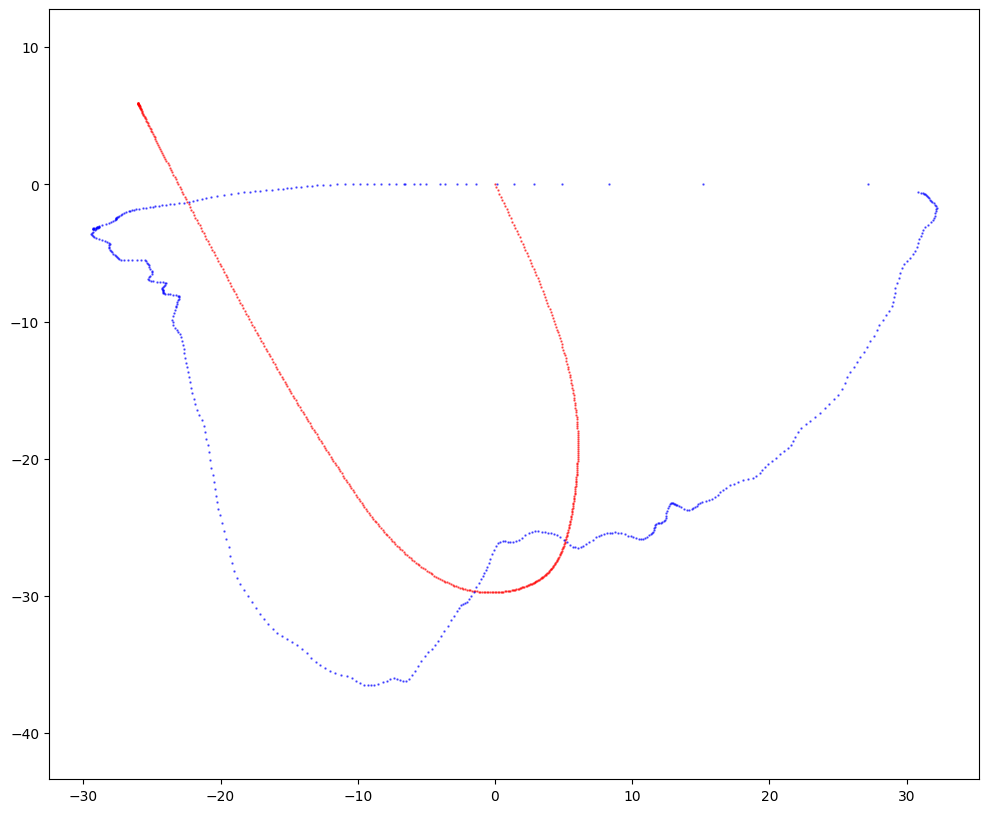

In [10]:
i = 50

x_i = x[i, :]
x_dot_i = x_dot[i, :]

mu_em_1 = A_1[0] @ (x_i.reshape(1, -1) - x_att_1).T
print(x_dot_i)
print(mu_em_1)

x_dot_1_pred = A_1[0] @ (x_1 - x_att_1).T
x_dot_1_pred = x_dot_1_pred.T

print(x_dot_1_pred.shape)

x_dot_2_pred = A_1[0] @ (x_2 - x_att_1).T
x_dot_2_pred = x_dot_2_pred.T

a = np.linalg.norm(x_dot_2_pred - x_dot_2, axis=1)


# x_dot_2_pred = A_2[0] @ (x_2 - x_att_2).T
# x_dot_2_pred = x_dot_2_pred.T

# b = np.linalg.norm(x_dot_2_pred - x_dot_2, axis=1)



colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
color_mapping = np.take(colors, sequence_arr)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()

# ax.scatter(x[:, 0], x[:, 1], color=color_mapping[:], alpha= 0.6, s=0.5)
ax.scatter(x_dot_1_pred[:, 0], x_dot_1_pred[:, 1], color='r', alpha= 0.6, s=0.5)
ax.scatter(x_dot_1[:, 0], x_dot_1[:, 1], color='b', alpha= 0.6, s=0.5)

ax.axis('equal')
plt.show()



In [11]:
mu_1 = np.mean(x_1, axis=0)
Sigma_1 = np.cov(x_1.T)
Sigma_1 = adjust_cov(Sigma_1)

mu_2 =  np.mean(x_2, axis=0)
Sigma_2 = np.cov(x_2.T)
Sigma_2 = adjust_cov(Sigma_2)

cov_em_1 = np.cov((x_dot_1.T - (A_1[0] @ (x_1-x_att_1).T))) + 0.001*np.eye(2)

cov_em_2 = np.cov((x_dot_2.T - (A_2[0] @ (x_2-x_att_2).T))) + 0.001*np.eye(2)

emissionMat = np.zeros((x.shape[0], 2)) 
# for i in [0, 1]:
for i in range(x.shape[0]):
    x_i = x[i, :]
    x_dot_i = x_dot[i, :]

    #P(x_ip1|s_ip1=s1) 
    P_x_ip1_s_ips_s1 = multivariate_normal.logpdf(x_i, mean=mu_1, cov=Sigma_1)

    #P(x_ip1|s_ip1=s2) 
    P_x_ip1_s_ips_s2 = multivariate_normal.logpdf(x_i, mean=mu_2, cov=Sigma_2)

    #P(x_dot_ip1|x_ip1, s_ip1=s1)
    mu_em_1 = A_1[0] @ (x_i.reshape(1, -1) - x_att_1).T
    P_x_dot_ip1_x_ip1_s_ip1_s1 =  multivariate_normal.logpdf(x_dot_i, mean=mu_em_1[:, 0], cov=cov_em_1)
    
    # normal_1 = multivariate_normal(mean=mu_em_1[:, 0], cov=cov_em_1)
    # P_x_dot_ip1_x_ip1_s_ip1_s1 = normal_1.logpdf(x_dot_i)


    #P(x_dot_ip1|x_ip1, s_ip1=s2)
    mu_em_2 = A_2[0] @ (x_i.reshape(1, -1) - x_att_2).T
    P_x_dot_ip1_x_ip1_s_ip1_s2 =  multivariate_normal.logpdf(x_dot_i, mean=mu_em_2[:, 0], cov=cov_em_2)


    #P(x_ip1, x_dot_ip1|s_ip1=s1) = P(x_dot_ip1|x_ip1, s_ip1=s1) * P(x_ip1|s_ip1=s1) 
    # P_x_ip1_x_dot_ip1_s_ip1_s1 = P_x_dot_ip1_x_ip1_s_ip1_s1 * P_x_ip1_s_ips_s1
    P_x_ip1_x_dot_ip1_s_ip1_s1 = P_x_dot_ip1_x_ip1_s_ip1_s1 + P_x_ip1_s_ips_s1

    #P(x_ip1, x_dot_ip1|s_ip1=s2) = P(x_dot_ip1|x_ip1, s_ip1=s2) * P(x_ip1|s_ip1=s2) 
    # P_x_ip1_x_dot_ip1_s_ip1_s2 = P_x_dot_ip1_x_ip1_s_ip1_s2 * P_x_ip1_s_ips_s2
    P_x_ip1_x_dot_ip1_s_ip1_s2 = P_x_dot_ip1_x_ip1_s_ip1_s2 + P_x_ip1_s_ips_s2

    emissionMat[i, 0] = P_x_ip1_x_dot_ip1_s_ip1_s1
    emissionMat[i, 1] = P_x_ip1_x_dot_ip1_s_ip1_s2

print(emissionMat)

[[ -22.2181766  -295.28270267]
 [ -19.04928456 -201.06920704]
 [ -17.70018912 -156.53066456]
 ...
 [ -14.37533033  -12.76314237]
 [ -14.39251424  -12.66368334]
 [ -14.74178812  -12.20879025]]


In [12]:
# alpha_1(s_1=s1) = P(x_0, x_dot_0, x_1, x_dot_1, s_1=s1) 
#                 = P(x_1, x_dot_1|s_1=s1) * (P(x_0, x_dot_0, s_0=s1)*P(s_1=s1|s_0=s1)+P(x_0, x_dot_0, s_0=s2)*P(s_1=s1|s_0=s2))


# alpha_0(s_0=s1) = P(x_0, x_dot_0, s_0=s1) = P(x_0, x_dot_0|s_0=s1) * P(s_0=s1)
alpha[0, 0] = emissionMat[0, 0] + np.log(1/2)

# alpha_0(s_0=s2) = P(x_0, x_dot_0, s_0=s2) = P(x_0, x_dot_0|s_0=s2) * P(s_0=s2)
alpha[0, 1] = emissionMat[0, 1] + np.log(1/2)

# normalize

logProb = alpha[0, :].reshape(-1, 1)
maxPostLogProb = np.max(logProb, axis=0, keepdims=True)
expProb = np.exp(logProb - np.tile(maxPostLogProb, (2, 1)))
postProb = expProb / np.sum(expProb, axis = 0, keepdims=True)


alpha[0, :] = postProb[:, 0]


for i in np.arange(1, alpha.shape[0]):
# for i in [1]:
    # alpha[1, 0] = P_x_ip1_x_dot_ip1_s_ip1_s1 * (alpha[0,0] * P_s_ip1_s1_s_i_s1 + alpha[0,1] * P_s_ip1_s1_s_i_s2)
    # alpha[i, 0] = emissionMat[i, 0] + np.log(alpha[i-1,0] * transitionMat[i-1, 0, 0] + alpha[i-1,1] * transitionMat[i-1, 0, 1])


    b_1 = np.log(alpha[i-1,0] * transitionMat[i-1, 0, 0] + alpha[i-1,1] * transitionMat[i-1, 0, 1])
    alpha[i, 0] = emissionMat[i, 0] 

    # alpha_1(s_1=s2) = P(x_0, x_dot_0, x_1, x_dot_1, s_1=s2) 
    #                 = P(x_1, x_dot_1|s_1=s1) * (P(x_0, x_dot_0, s_0=s1)*P(s_1=s2|s_0=s1)+P(x_0, x_dot_0, s_0=s2)*P(s_1=s2|s_0=s2))
    # alpha[i, 1] = emissionMat[i, 1] + np.log(alpha[i-1,0] * transitionMat[i-1, 1, 0] + alpha[i-1,1] * transitionMat[i-1, 1, 1])
    b_2 = np.log(alpha[i-1,0] * transitionMat[i-1, 1, 0] + alpha[i-1,1] * transitionMat[i-1, 1, 1])
    alpha[i, 1] = emissionMat[i, 1] 


    logProb = alpha[i, :].reshape(-1, 1)
    maxPostLogProb = np.max(logProb, axis=0, keepdims=True)
    expProb = np.exp(logProb - np.tile(maxPostLogProb, (2, 1)))
    postProb = expProb / np.sum(expProb, axis = 0, keepdims=True)
   
    alpha[i, :] = postProb[:, 0]




In [13]:
sequence_arr = np.argmax(alpha, axis = 1)

In [14]:
def _step(x, x_att, A, dt):
    x_dot     = np.zeros((x.shape[1], 1))

    gamma = np.ones((1, x.shape[0]))
    for k in range(1):
        x_dot  += gamma[k, 0] * A[k] @ (x - x_att).T
    x_next = x + x_dot.T * dt

    return x_next, gamma, x_dot

In [15]:
def sim(x_init, x_att, A, dt):
    tol = 10E-4
    max_iter = 10000

    x_test = [x_init]
    gamma_test = []
    v_test = []

    i = 0
    # while np.linalg.norm(x_test[-1]-x_att) >= tol:
    while i < max_iter:
        x_next, gamma, v = _step(x_test[-1], x_att, A, dt)
        x_test.append(x_next)        
        gamma_test.append(gamma[:, 0])
        v_test.append(v)

        i += 1

    return np.vstack(x_test)

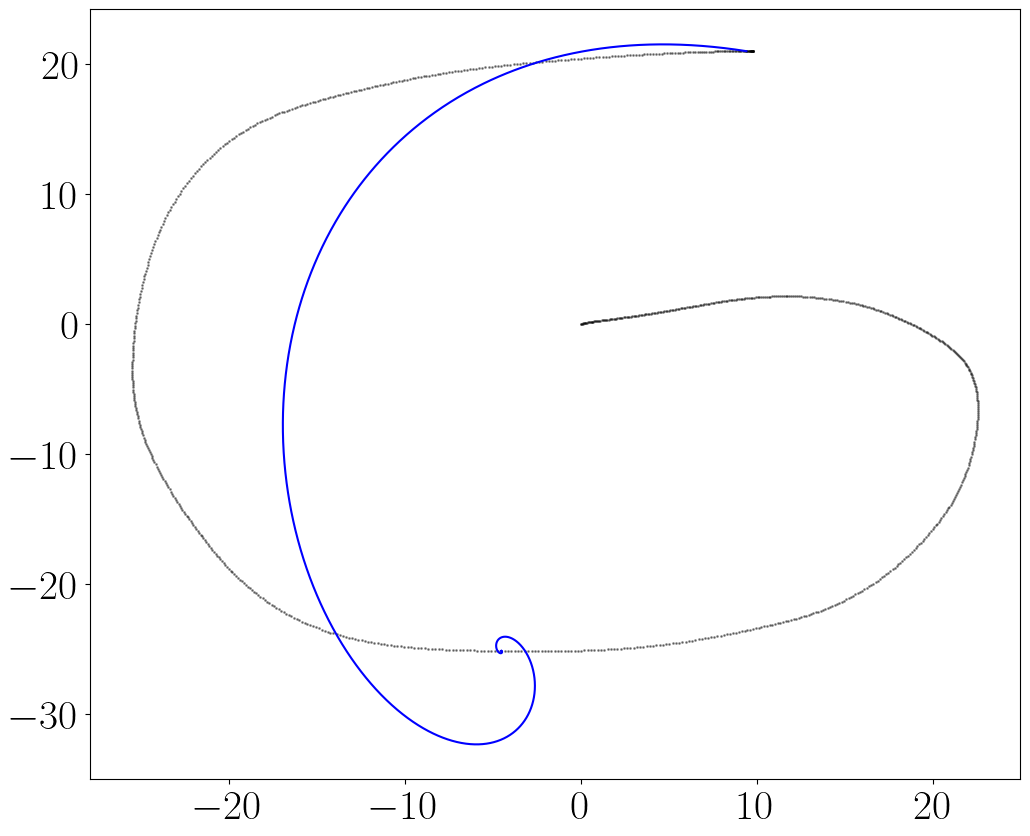

In [16]:
# # evaluate results
x_test_list = []

for x_0 in x_init:
    x_test_list.append(sim(x_1[0, :].reshape(1, -1), x_att_1, A_1, dt=0.005))


# plot results
from src.lpvds.src.util import plot_tools
plot_tools.plot_ds_3d(x, x_test_list)
plt.show()



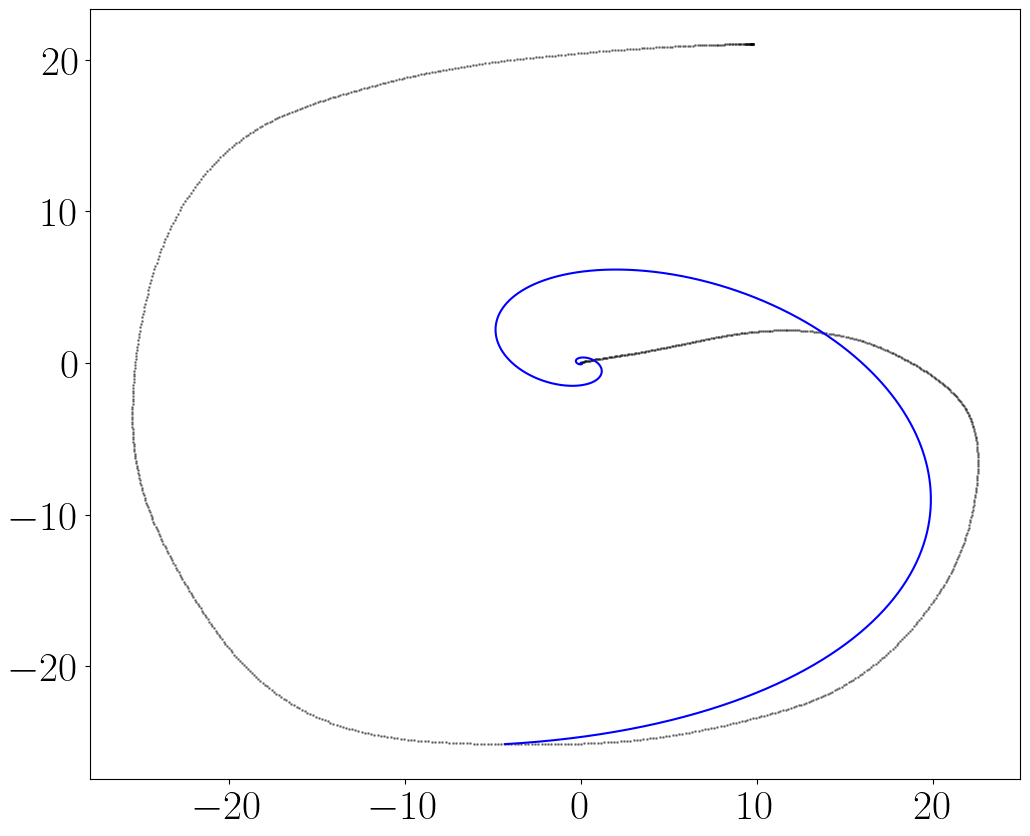

In [17]:
# # evaluate results
x_test_list = []

for x_0 in x_init:
    x_test_list.append(sim(x_2[0, :].reshape(1, -1), x_att_2, A_2, dt=0.005))


# plot results
from src.lpvds.src.util import plot_tools
plot_tools.plot_ds_3d(x, x_test_list)
plt.show()



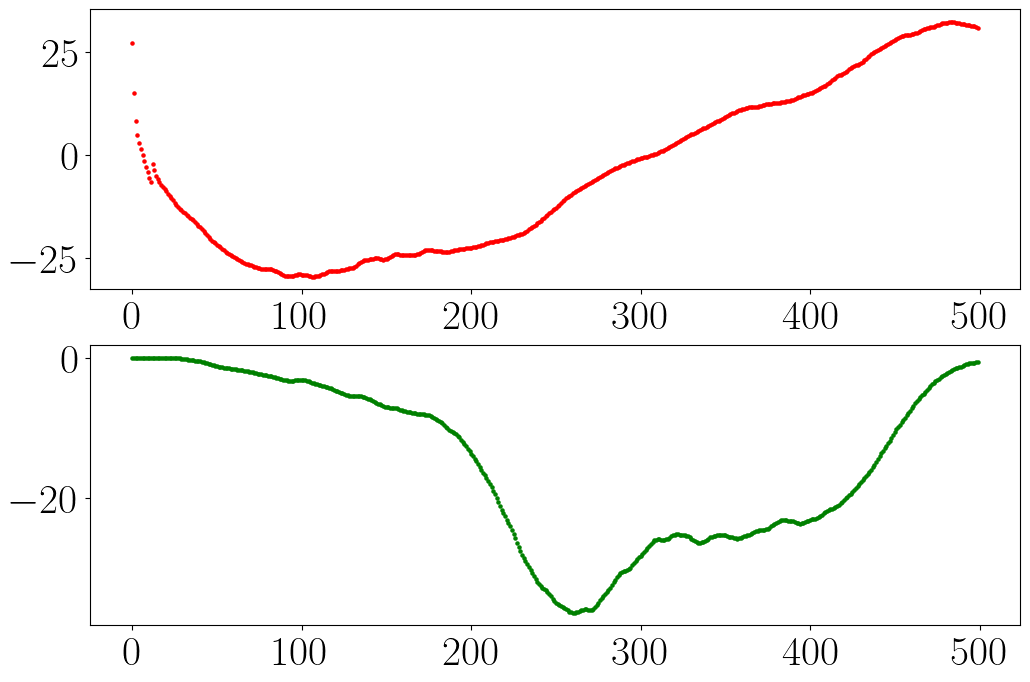

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

M_1 = x_dot_1.shape[0]
for k in range(2):
    axs[k].scatter(np.arange(M_1), x_dot_1[:, k], s=5, color=colors[k])
